We have a few elements that can be useful. Word counts, average word length, parts of speech, and the content of the review. 

Let's see which words are associated with each game.

we can group vectors by week or month... we can get bi and trigrams counts for each month.



In [1]:
# Load com.miHoYo.GenshinImpact

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google_play_scraper import app, Sort, reviews_all, permissions

from os import listdir, path
from os.path import isfile, join
import pickle
from collections import Counter

# import these modules
import nltk
from nltk.corpus import stopwords
nltk.data.path.append('/tf/school/Capstone')
nltk.download('wordnet', download_dir='/tf/school/Capstone')
nltk.download('omw-1.4', download_dir='/tf/school/Capstone')
nltk.download('stopwords', download_dir='/tf/school/Capstone')
from nltk.stem import WordNetLemmatizer

my_stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'


import commonFunctions as cf

import re


def getReviewsDf(app_id = None):
    mypath = 'sentReviews/'
    reviews_df = None
    if path.exists(mypath + app_id):
        reviews_df = pd.read_pickle(mypath + app_id, compression='gzip')

    return reviews_df

# reviews_df = getReviewsDf('com.YoStarEN.Arknights.pkl')

reviews_df = cf.getReviewsDf()

display(reviews_df.columns)
print(len(reviews_df))
# Let's remove some elements that won't help us that much this includes foreign languages...
reviews_df = reviews_df[reviews_df['review_average_word_len'] < 15]

# remove reviews that don't have the POS tags
tempCols = ['NN','NNS','NNP','NNPS','VB','VBG','VBD','VBN','VBP','VBZ','JJ','JJR','JJS']

reviews_df['sum'] = reviews_df[tempCols].sum(axis=1)
reviews_df = reviews_df[reviews_df['sum'] > 0]

print(len(reviews_df))

reviews_df.head()

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-h9hzsz__ because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
[nltk_data] Downloading package wordnet to /tf/school/Capstone...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /tf/school/Capstone...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /tf/school/Capstone...
[nltk_data]   Package stopwords is already up-to-date!


Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount', 'at',
       'title', 'description', 'summary', 'size', 'developer', 'contentRating',
       'updated', 'released', 'appId', 'sentiment', 'review_word_count',
       'review_average_word_len', 'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBG',
       'VBD', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS'],
      dtype='object')

2461319
1503346


,reviewId,userName,content,score,thumbsUpCount,at,title,description,summary,size,...,VB,VBG,VBD,VBN,VBP,VBZ,JJ,JJR,JJS,sum
0,gp:AOqpTOHeXtcxesY0s6oCJYMlDPBOZ4Zdnj6HzbPhcd1...,Derrick Frantal,Fun. Strategic. Nice art. But most importantly...,5,0,2022-03-15 01:52:10,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,3
1,gp:AOqpTOFnfbcsywKq4__k6rBBWkoKtmj5R8mXfRTQqVg...,M A.,Hardest game i ever play,5,0,2022-03-15 01:24:59,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,2
2,gp:AOqpTOH7IFtnDuyQdwXbdHktD9pSQcZ1051pC5Hsfn_...,Kazzi,"most rewarding for rewards and gacha, immersiv...",5,1,2022-03-15 00:34:13,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,3,0,0,0,0,0,4,0,0,13
3,gp:AOqpTOEHcra3ybz74C9MhORbu8xdgaI5ALU0zQh3q1O...,Arjey Bagasbas,"For F2P players and weebs here, this is a game...",5,0,2022-03-14 23:56:09,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,3,0,0,0,4,5,5,0,0,41
4,gp:AOqpTOG-4_b2Qow31H3SxYxv_Sr3PKTt2_3ZH4ZeGiy...,Zweï,Strategy rpg × tower defence blended to perfec...,5,0,2022-03-14 23:07:11,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,4


In [2]:
# we can preprocess some text...



from nltk.corpus import wordnet
import nltk
nltk.download('wordnet', download_dir='/tf/school/Capstone')


from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
    
    
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem



reviews_df['content']=reviews_df['content'].str.lower()

# remove extra whitespaces
def remove_whitespace(text):
    return  " ".join(text.split())


def remove_puncuation(text):
    my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
    return re.sub('['+my_punctuation + ']+', '', text) # strip punctuation

def remove_numbers(text):
    return re.sub('([0-9]+)', '', text) # remove numbers

def remove_stopwords(text):
     return " ".join([word for word in text.split(' ')
                            if word not in my_stopwords]) # remove stopwords
def lemmatize_stemming(text):
    return word_rooter(WordNetLemmatizer().lemmatize(text, pos='v'))


reviews_df['content']=reviews_df['content'].apply(lambda x: remove_whitespace(x))

reviews_df['content']=reviews_df['content'].apply(lambda x: remove_puncuation(x))

reviews_df['content']=reviews_df['content'].apply(lambda x: remove_numbers(x))

reviews_df['content']=reviews_df['content'].apply(lambda x: remove_stopwords(x))

reviews_df['content']=reviews_df['content'].apply(lambda x: lemmatize_stemming(x))




from nltk import word_tokenize

# reviews_df['content']=reviews_df['content'].apply(lambda X: word_tokenize(X))

[nltk_data] Downloading package wordnet to /tf/school/Capstone...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
reviews_df.head()

,reviewId,userName,content,score,thumbsUpCount,at,title,description,summary,size,...,VB,VBG,VBD,VBN,VBP,VBZ,JJ,JJR,JJS,sum
0,gp:AOqpTOHeXtcxesY0s6oCJYMlDPBOZ4Zdnj6HzbPhcd1...,Derrick Frantal,fun strategic nice art importantly fun,5,0,2022-03-15 01:52:10,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,3
1,gp:AOqpTOFnfbcsywKq4__k6rBBWkoKtmj5R8mXfRTQqVg...,M A.,hardest game ever play,5,0,2022-03-15 01:24:59,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,2
2,gp:AOqpTOH7IFtnDuyQdwXbdHktD9pSQcZ1051pC5Hsfn_...,Kazzi,rewarding rewards gacha immersive content char...,5,1,2022-03-15 00:34:13,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,3,0,0,0,0,0,4,0,0,13
3,gp:AOqpTOEHcra3ybz74C9MhORbu8xdgaI5ALU0zQh3q1O...,Arjey Bagasbas,fp players weebs game fits especially ones lov...,5,0,2022-03-14 23:56:09,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,3,0,0,0,4,5,5,0,0,41
4,gp:AOqpTOG-4_b2Qow31H3SxYxv_Sr3PKTt2_3ZH4ZeGiy...,Zweï,strategy rpg × tower defence blended perfect,5,0,2022-03-14 23:07:11,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,0,0,4


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

documents = reviews_df['content']


# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=10, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.85, min_df=10, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [5]:
# Let's try again...
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24


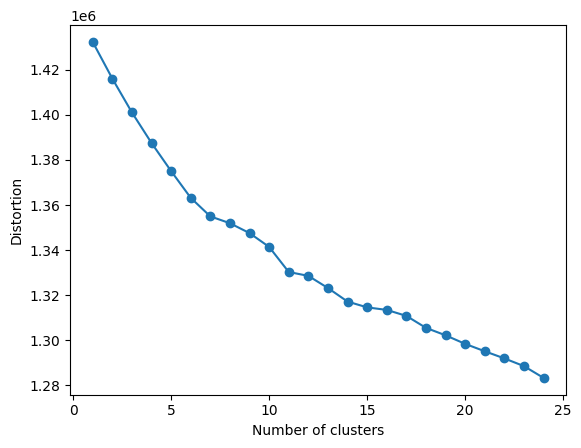

In [6]:
# calculate distortion for a range of number of cluster
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import NMF, LatentDirichletAllocation


X = tfidf
distortions = []

for i in range(1, 25):
#     lda = LatentDirichletAllocation(n_topics=i, max_iter=5,
#                                     learning_method='online', 
#                                     learning_offset=50.,
#                                     random_state=0).fit(tf)

    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [7]:
# calculate distortion for a range of number of cluster
# from sklearn.cluster import KMeans
# import numpy as np


# X = tfidf
# distortions = []

# for i in range(1, 11):
#     km = KMeans(
#         n_clusters=i, init='random',
#         n_init=10, max_iter=300,
#         tol=1e-04, random_state=0
#     )
#     km.fit(X)
#     distortions.append(km.inertia_)

# # plot
# plt.plot(range(1, 11), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()

In [8]:
# from sklearn.cluster import KMeans

# km = KMeans(
#     n_clusters=7, init='random',
#     n_init=10, max_iter=300, 
#     tol=1e-04, random_state=0
# )
# y_km = km.fit_predict(X)

# reviews_df['cluster'] = y_km

In [9]:
# reviews_df.head()

In [10]:
# reviews_df[['score','cluster']].groupby('cluster').mean().reset_index()

In [11]:
# plt.scatter(
#     X[y_km == 0, 0], X[y_km == 0, 1],
#     s=50, c='lightgreen',
#     marker='s', edgecolor='black',
#     label='cluster 1'
# )

# plt.scatter(
#     X[y_km == 1, 0], X[y_km == 1, 1],
#     s=50, c='orange',
#     marker='o', edgecolor='black',
#     label='cluster 2'
# )

# plt.scatter(
#     X[y_km == 2, 0], X[y_km == 2, 1],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )

# # plot the centroids
# plt.scatter(
#     km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
#     s=250, marker='*',
#     c='red', edgecolor='black',
#     label='centroids'
# )
# plt.legend(scatterpoints=1)
# plt.grid()
# plt.show()

In [12]:
#NOTE: we have to plot the number of the cluster somehow. We don't know 0,0 is cluster 0

# to me it looks like there might be 5 groups not the 7. The three in the bottom left appear pretty close and what is the 0,0 position?
# before we get too far we need to know what this 0,0 is. It's possible we need to remove that if it is dirty data.

# display(reviews_df['score'].mean())
# display((reviews_df[reviews_df['cluster'] == 0])['score'].mean())
# display((reviews_df[reviews_df['cluster'] == 0])['score'].values[:10])
# display((reviews_df[reviews_df['cluster'] == 0])['sentiment'].values[:10])
# (reviews_df[reviews_df['cluster'] == 0])['content'].values[:10]

In [13]:
# I can see some weird situations... someone gave a score of 1, but the sentiment was positive, and when I read it
# it was also informative and sounded good. Maybe the cluster is properly grouping good comments?


# km = KMeans(
#     n_clusters=5, init='random',
#     n_init=10, max_iter=300, 
#     tol=1e-04, random_state=0
# )
# y_km = km.fit_predict(X)

# # reviews_df['cluster'] = y_km



# plt.scatter(
#     km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
#     s=250, marker='*',
#     c='red', edgecolor='black',
#     label='centroids'
# )
# plt.legend(scatterpoints=1)
# plt.grid()
# plt.show()

In [14]:
# LDA

# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.model_selection import GridSearchCV

# # lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


# # Define Search Param
# search_params = {'n_components': [5,7,10], 'learning_decay': [.5]}

# # Init the Model
# lda = LatentDirichletAllocation(n_jobs=-1)

# # Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)

# # Do the Grid Search
# model.fit(tf)

In [15]:
# # Best Model
# best_lda_model = model.best_estimator_

# # Model Parameters
# print("Best Model's Params: ", model.best_params_)

# # Log Likelihood Score
# print("Best Log Likelihood Score: ", model.best_score_)

# # Perplexity
# print("Model Perplexity: ", best_lda_model.perplexity(tf))

In [16]:

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=10, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

        
lda = LatentDirichletAllocation(n_components=5,n_jobs=-1,
                                max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
     

/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
display_topics(lda, tf_feature_names, 20)

Topic 0:
game play fix app update phone download time account im data problem cat wont screen lost error start playing help
Topic 1:
game love best great gam played mobile amazing ive games play far final rpg fantasy playing im fan like worth
Topic 2:
game cards yugioh dont make like money star duel need bad think add deck want im better got spend people
Topic 3:
game good fun great play really like awesome gam pay free graphics cool easy time win pretty old real story
Topic 4:
game card fun nice characters really playing new hard enjoy story like bit pvp monsters games cats lot play monster


In [18]:
reviews_df['title'].unique()

array(['Arknights', 'Azur Lane', 'Fate/Grand Order (English)',
       'Disney Twisted-Wonderland', 'DRAGON BALL LEGENDS',
       'MY HERO ULTRA IMPACT', 'ONE PIECE Bounty Rush',
       'SLIME - ISEKAI Memories', 'DRAGON BALL Z DOKKAN BATTLE',
       'Summoners War', 'Princess Connect! Re: Dive',
       'Pokémon Masters EX', 'Idle Heroes', 'Guardian Tales', 'AFK Arena',
       'Genshin Impact', 'Honkai Impact 3rd', 'ONE PIECE TREASURE CRUISE',
       'Identity V', 'MARVEL Future Fight', 'The Seven Deadly Sins',
       'MapleStory M - Fantasy MMORPG', 'Fire Emblem Heroes',
       'Mario Kart Tour', 'RAID: Shadow Legends',
       'HATSUNE MIKU: COLORFUL STAGE!', 'DISSIDIA FINAL FANTASY OO',
       'FINAL FANTASY  BRAVE EXVIUS', 'FFBE WAR OF THE VISIONS',
       'Epic Seven', 'Evertale', 'ANOTHER EDEN Global', 'The Battle Cats',
       'Puzzle & Dragons', 'Yu-Gi-Oh! Duel Links',
       'Yu-Gi-Oh! Master Duel'], dtype=object)

In [19]:
lda.components_.shape


(5, 1000)

In [20]:
W = lda.transform(tf)

In [21]:
W.shape

(1503346, 5)

In [22]:
W[0]

array([0.04      , 0.04060681, 0.04      , 0.46011462, 0.41927857])

In [23]:
W[0:5]

array([[0.04      , 0.04060681, 0.04      , 0.46011462, 0.41927857],
       [0.06822041, 0.06877752, 0.06690384, 0.72863786, 0.06746037],
       [0.01602537, 0.33155003, 0.09727487, 0.01546336, 0.53968637],
       [0.07452397, 0.00777821, 0.75568508, 0.00776125, 0.15425149],
       [0.04      , 0.24000052, 0.04      , 0.29652746, 0.38347202]])

In [24]:
# get the highest field
clusters= [np.argsort(x)[-1] for x in W]
# clusters

In [25]:
print(len(reviews_df))
print(len(clusters))

1503346
1503346


In [26]:
reviews_df['lda_clusters'] = clusters

In [27]:
reviews_df[reviews_df['lda_clusters'] == 0]['content']

5                             keep crashing logging g ultra 
11         giving one star game crashes every time try ge...
14              trying log day play crashes every single tim
17         reason give one star cause got new phone went ...
19         unplayable new player download frequently cras...
                                 ...                        
2461291    phone never ran hot please fix optimization bo...
2461297    first try looks great theres bug black screen ...
2461301    ingame download keeps turning reason pls solve...
2461304    problem linking konami id android version sets...
2461312     hours pc satisfied game moment putting  stars...
Name: content, Length: 317831, dtype: object

In [28]:
reviews_df[reviews_df['lda_clusters'] == 1]['content']

10         game great pw  yostar make anime game maybe great
20         cant believe ive playing game year expect good...
34         game long dialogues characters yes building en...
39                                      amazing game love iy
92                                            best getcha ev
                                 ...                        
2461281                                  best yugioh game ev
2461287     interactions incorrect overall im blown away gam
2461290    im addicted game im excited build nostalgic fa...
2461300               game got back yugioh many years im lov
2461307                                  best yugioh app tim
Name: content, Length: 307642, dtype: object

In [29]:
reviews_df[reviews_df['lda_clusters'] == 2]['content']

3          fp players weebs game fits especially ones lov...
9          quit alr rated unwelcoming new players pity le...
29         lot players would stayed playing add basic qol...
36         hope arknights implement auto clear stage star...
60                                      love need say anymor
                                 ...                        
2461276    greatest yu gi oh game ever better duel links ...
2461286                  il gioco di carte yugioh definitivo
2461296    love much better duel links getting card much ...
2461311                         rip duel links linked us gam
2461317                                 gave ward dating tip
Name: content, Length: 269265, dtype: object

In [30]:
emotions = pd.read_pickle('emotions_dictionary.plk')

In [31]:
print(type(emotions))

<class 'dict'>


In [32]:
# Regex for identifying words that don’t have numbers.
reg = re.compile(r'[a-zA-Z]+')


match = re.findall(reg, "I was born on June 24") 

In [33]:
match

['I', 'was', 'born', 'on', 'June']

In [34]:

from nltk.corpus import wordnet
import nltk
nltk.download('wordnet', download_dir='/tf/school/Capstone')


from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
    
    
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

# nltk.download('averaged_perceptron_tagger', download_dir='/tf/school/Capstone')
# emotions.values()

[nltk_data] Downloading package wordnet to /tf/school/Capstone...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
word_rooter('acceptance')

'accept'

In [36]:
rootedEmotions = {}

for word in emotions.keys():
    if(word_rooter(word) in rootedEmotions):
        # we need to append
        rootedEmotions[word_rooter(word)].extend([word_rooter(x) for x in emotions[word] ])
    else:
        rootedEmotions[word_rooter(word)] = [word_rooter(x) for x in emotions[word] ]

In [37]:
rootedEmotions

{'accept': ['accept'],
 'admir': ['admir', 'appreci'],
 'ador': ['ador', 'latria'],
 'affect': ['affect',
  'affection',
  'fond',
  'tender',
  'heart',
  'warm',
  'warmhearted',
  'philia'],
 'afraid': ['afraid'],
 'agit': ['agit'],
 'agoni': ['agoni', 'suffer', 'excruci'],
 'aggress': ['aggress', 'belliger'],
 'alarm': ['alarm', 'alert', 'alarm'],
 'alien': ['alien'],
 'amaz': ['astonish', 'amaz'],
 'ambival': ['ambival', 'ambival'],
 'amus': ['entertain', 'amus'],
 'anger': ['anger', 'see_r'],
 'anguish': ['pain', 'anguish', 'hurt'],
 'annoy': ['annoy', 'harass', 'harri', 'pester', 'vex'],
 'anticip': ['anticip'],
 'anxiou': ['anxiou', 'nervou', 'queasi', 'uneasi', 'unquiet'],
 'apathi': ['apathi', 'indiffer', 'numb', 'spiritless'],
 'apprehens': ['apprehens',
  'arrest',
  'catch',
  'collar',
  'pinch',
  'taking_into_custodi'],
 'arrog': ['arrog', 'chesti', 'self-import'],
 'assert': ['assert', 'self-assert', 'self-assert'],
 'astonish': ['amaz', 'astoni', 'astonish', 'astound'

In [38]:
documents = reviews_df['content'].values

In [39]:
def getEmotion(word):
    def findWordInList(word):
        for elem in rootedEmotions.values():
            if word in elem:
                return True
        return False
    
    word = word_rooter(word)
#     print(word)
    if findWordInList(word):
        # get the main word
        for key in rootedEmotions.keys():
            if word in rootedEmotions[key]:
                # if we find the rooted word in a list then get the main word and
                # return it.
                return key
    return None

import re

def tokenize_stem_emotion_vect(text):
    if text is None or text == '':
        return []
#     print(text)
    match = re.findall(reg, text)
#     print(match)
    
    words = [getEmotion(x.lower()) for x in match]
    return [x for x in words if x]

In [40]:
print('ador' in rootedEmotions.values())
tokenize_stem_emotion_vect('I adore it')

False


['ador']

In [41]:
'ador' in ['ador']

True

In [42]:
# rootedEmotions.keys()
# list(rootedEmotions.values())
# rootedEmotions.values()
# fun, rewarding, cute, worth, unfair, patient, perfect, uplifting, great,crash,tri,good, lack, smooth
print(len(documents))
' '.join(tokenize_stem_emotion_vect(documents[20]))

1503346


'depress like interest'

In [43]:
reviews_df['emotions']= reviews_df['content'].apply(lambda x: tokenize_stem_emotion_vect(x))

In [44]:
reviews_df['emotions']

0                                 []
1                                 []
2                          [content]
3                             [love]
4                                 []
                     ...            
2461312    [irrit, hope, disappoint]
2461313                       [like]
2461315                 [hope, like]
2461316                           []
2461317                           []
Name: emotions, Length: 1503346, dtype: object

In [45]:
tf_emotions_vectorizer = CountVectorizer(max_df=0.80, min_df=10, max_features=100, stop_words='english')



# docs = ' '.join()

tf_emotions = tf_emotions_vectorizer.fit_transform(reviews_df['emotions'].apply(lambda x: ' '.join(x) ).values)
tf_emotions_feature_names = tf_emotions_vectorizer.get_feature_names()

/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


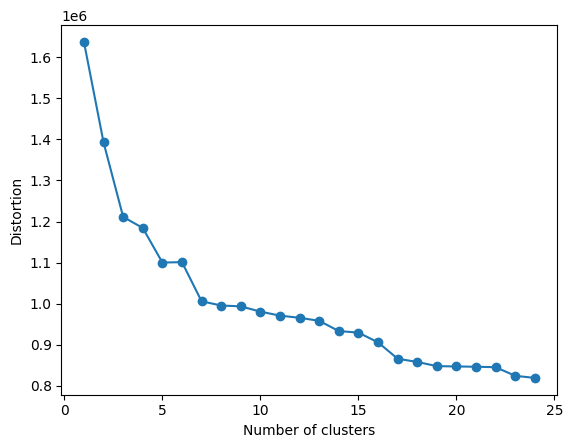

In [46]:
distortions =[]
for i in range(1, 25):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(tf_emotions)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

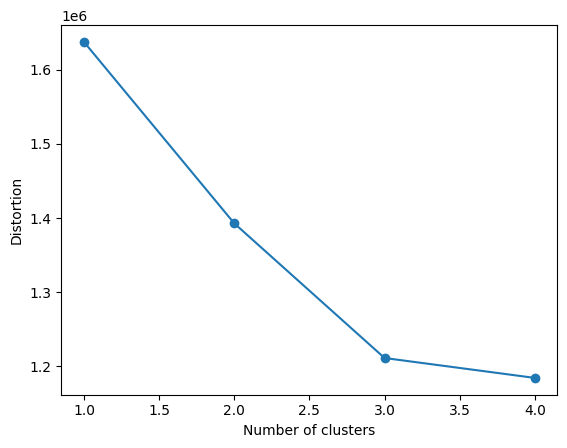

In [47]:
distortions =[]
for i in range(1, 5):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(tf_emotions)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 5), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [48]:

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

        
lda = LatentDirichletAllocation(n_components=3,n_jobs=-1,
                                max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf_emotions)
     

In [49]:
display_topics(lda, tf_emotions_feature_names, 20)

Topic 0:
like thank hope bore vigil dread kind disappoint gloomi frustrat courag nostalg suspici puzzl sad admir apprehens shame neg irrit
Topic 1:
comfort long baffl content depress impati expect hate disturb care toler friendli eager amus strong mad overwhelm surpris attent reliev
Topic 2:
love enjoy amaz pleas ecstasi annoy attract stuck happi excit affect loopi anguish tire troubl delight trust upset discomfort relax


In [50]:
print(len(tf_emotions_feature_names))
print(tf_emotions_feature_names)

100
['accept', 'admir', 'ador', 'affect', 'agoni', 'amaz', 'amus', 'anguish', 'annoy', 'apprehens', 'astonish', 'attent', 'attract', 'baffl', 'bore', 'care', 'careless', 'comfort', 'content', 'courag', 'cruelti', 'curios', 'delight', 'demor', 'depress', 'desir', 'determin', 'disappoint', 'discomfort', 'disgust', 'dislik', 'disturb', 'domin', 'doubt', 'dread', 'eager', 'ecstasi', 'elat', 'enjoy', 'excit', 'expect', 'focus', 'friendli', 'frustrat', 'gloomi', 'greed', 'happi', 'hate', 'hope', 'idl', 'impati', 'indign', 'infuri', 'insult', 'intrigu', 'irrit', 'isol', 'joy', 'kind', 'lazi', 'like', 'long', 'loopi', 'love', 'mad', 'neg', 'neglect', 'nostalg', 'outrag', 'overwhelm', 'patienc', 'piti', 'pleas', 'posit', 'puzzl', 'rage', 'regret', 'relax', 'reliev', 'revuls', 'sad', 'seren', 'shame', 'shock', 'stress', 'strong', 'stuck', 'surpris', 'suspici', 'thank', 'thrill', 'tire', 'toler', 'troubl', 'trust', 'upset', 'vigil', 'weak', 'worri', 'worthi']


In [51]:
emotionNames = [x for x in rootedEmotions.keys()]

In [52]:
print(len(emotionNames))
# emotionNames

270


In [53]:
reviews_df['emotions'].values[3] #in emotionNames

['love']

In [54]:
# create a dictionary for each emotion and store an array of the counts for each pandas row...
pandas_emotions_dict = {}
for emotion in emotionNames:
    # we'll automatically create empty arrays for each review
    pandas_emotions_dict[emotion]=[0] * len(reviews_df)

for index, row in enumerate(reviews_df['emotions'].values):
    for emotion in row:
        pandas_emotions_dict[emotion][index] = pandas_emotions_dict[emotion][index] +1

In [55]:
# pandas_emotions_dict
new = pd.DataFrame.from_dict(pandas_emotions_dict)
new.head()    

,accept,admir,ador,affect,afraid,agit,agoni,aggress,alarm,alien,...,upset,veng,viciou,vigil,vulner,weak,woe,worri,worthi,wrath
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
print(len(new))
print(len(reviews_df))

1503346
1503346


In [57]:
new[new['love']>1]['love']

48         2
107        3
124        2
216        2
279        7
          ..
1502468    2
1502518    2
1502557    2
1502598    2
1502832    2
Name: love, Length: 24579, dtype: int64

In [58]:
print(reviews_df.columns)

display(new.head())
display(reviews_df)

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount', 'at',
       'title', 'description', 'summary', 'size', 'developer', 'contentRating',
       'updated', 'released', 'appId', 'sentiment', 'review_word_count',
       'review_average_word_len', 'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBG',
       'VBD', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS', 'sum', 'lda_clusters',
       'emotions'],
      dtype='object')


,accept,admir,ador,affect,afraid,agit,agoni,aggress,alarm,alien,...,upset,veng,viciou,vigil,vulner,weak,woe,worri,worthi,wrath
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,reviewId,userName,content,score,thumbsUpCount,at,title,description,summary,size,...,VBD,VBN,VBP,VBZ,JJ,JJR,JJS,sum,lda_clusters,emotions
0,gp:AOqpTOHeXtcxesY0s6oCJYMlDPBOZ4Zdnj6HzbPhcd1...,Derrick Frantal,fun strategic nice art importantly fun,5,0,2022-03-15 01:52:10,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,3,3,[]
1,gp:AOqpTOFnfbcsywKq4__k6rBBWkoKtmj5R8mXfRTQqVg...,M A.,hardest game ever play,5,0,2022-03-15 01:24:59,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,2,3,[]
2,gp:AOqpTOH7IFtnDuyQdwXbdHktD9pSQcZ1051pC5Hsfn_...,Kazzi,rewarding rewards gacha immersive content char...,5,1,2022-03-15 00:34:13,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,4,0,0,13,4,[content]
3,gp:AOqpTOEHcra3ybz74C9MhORbu8xdgaI5ALU0zQh3q1O...,Arjey Bagasbas,fp players weebs game fits especially ones lov...,5,0,2022-03-14 23:56:09,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,4,5,5,0,0,41,2,[love]
4,gp:AOqpTOG-4_b2Qow31H3SxYxv_Sr3PKTt2_3ZH4ZeGiy...,Zweï,strategy rpg × tower defence blended perfect,5,0,2022-03-14 23:07:11,Arknights,Take on the role of a key member of Rhodes Isl...,"Through the darkness, we see light",92M,...,0,0,0,0,0,0,0,4,4,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461312,gp:AOqpTOEJDzvkjurcCNlhDdV9QE1tE8wTwrBF3dXp9AK...,Hafizullah Hayat,hours pc satisfied game moment putting stars...,5,7,2022-01-27 08:02:55,Yu-Gi-Oh! Master Duel,"An authentic ""Yu-Gi-Oh!"" digital card game!\r\...","An authentic ""Yu-Gi-Oh!"" digital card game! A ...",176M,...,0,0,3,0,0,0,0,11,0,"[irrit, hope, disappoint]"
2461313,gp:AOqpTOHaYLE_erCC1F5xpHWEgGdfZWyMG5sA2rA5OD8...,Shiki xD,cool game play againt someone else credit card...,5,6,2022-01-27 07:10:50,Yu-Gi-Oh! Master Duel,"An authentic ""Yu-Gi-Oh!"" digital card game!\r\...","An authentic ""Yu-Gi-Oh!"" digital card game! A ...",176M,...,0,0,0,0,0,0,0,16,4,[like]
2461315,gp:AOqpTOG69gdpzxGqdvQjpSobVHKS8NJMft-8i5kx0Ad...,Nathan I.A,best yugioh card simulation game ever made rea...,5,21,2022-01-27 03:56:01,Yu-Gi-Oh! Master Duel,"An authentic ""Yu-Gi-Oh!"" digital card game!\r\...","An authentic ""Yu-Gi-Oh!"" digital card game! A ...",176M,...,0,0,0,0,4,0,0,13,4,"[hope, like]"
2461316,gp:AOqpTOFXW6cc_f16ZeIILCOxJ0ePJN9gT-e4LkReto9...,Gabriel Farias,clã ud discord melhor clã brasil aaaaaaaaaaaa,5,0,2022-01-27 03:10:38,Yu-Gi-Oh! Master Duel,"An authentic ""Yu-Gi-Oh!"" digital card game!\r\...","An authentic ""Yu-Gi-Oh!"" digital card game! A ...",176M,...,0,0,0,0,0,0,0,6,4,[]


In [61]:
columnsForEmotions = ['title','sentiment','lda_clusters']

game_emotions_df = reviews_df[columnsForEmotions].reset_index()
game_emotions_df = game_emotions_df.drop('index', 1)
display(game_emotions_df.head())
display(new.head())
print(len(reviews_df))
display(len(new))
game_emotions_df = pd.concat([game_emotions_df, new], axis=1)
print(len(game_emotions_df))
# game_emotions_df=game_emotions_df.groupby(['title','sentiment']).count().reset_index()
game_emotions_df.head()

<ipython-input-61-da0fa72d6fc5>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  game_emotions_df = game_emotions_df.drop('index', 1)


,title,sentiment,lda_clusters
0,Arknights,positive,3
1,Arknights,negative,3
2,Arknights,positive,4
3,Arknights,positive,2
4,Arknights,positive,4


,accept,admir,ador,affect,afraid,agit,agoni,aggress,alarm,alien,...,upset,veng,viciou,vigil,vulner,weak,woe,worri,worthi,wrath
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1503346


1503346

1503346


,title,sentiment,lda_clusters,accept,admir,ador,affect,afraid,agit,agoni,...,upset,veng,viciou,vigil,vulner,weak,woe,worri,worthi,wrath
0,Arknights,positive,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arknights,negative,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arknights,positive,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arknights,positive,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arknights,positive,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
game_emotions_df.to_pickle('game_emotions_vector_df_reviews.pkl',protocol=4,compression='gzip')

In [ ]:
# Let's save a grouped version

game_emotions_df = pd.read_pickle('game_emotions_vector_df_reviews.pkl',compression='gzip')
columns_for_games = ['title','sentiment'] + list(set(game_emotions_df.columns) - set(['lda_clusters','title','sentiment']))
print(columns_for_games)

In [ ]:
newCols = game_emotions_df.columns.values
newCols[1] = 'sentiment_cnn'
game_emotions_df.columns = newCols
# game_emotions_df.rename(columns={'sentiment_cnn': 'sentiment'}, inplace=True)

In [15]:
game_emotions_df = game_emotions_df.drop('sentiment', 1)
game_emotions_df.rename(columns={'sentiment_cnn': 'sentiment'}, inplace=True)

game_emotions_df.head()

<ipython-input-15-2aa099b7d298>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  game_emotions_df = game_emotions_df.drop('sentiment', 1)


,title,sentiment,lda_clusters,accept,admir,ador,affect,afraid,agit,agoni,...,upset,veng,viciou,vigil,vulner,weak,woe,worri,worthi,wrath
0,Arknights,positive,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arknights,negative,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arknights,positive,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arknights,positive,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arknights,positive,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
game_emotions_df.to_pickle('game_emotions_vector_df_reviews.pkl',protocol=4,compression='gzip')

# game_emotions_df['sentiment']

game_emotions_df[columns_for_games].head().groupby(['title','sentiment']).count().reset_index().to_pickle('game_emotions_vector_df.pkl',protocol=4,compression='gzip')

In [64]:
# reg = re.compile(r'[a-zA-Z]+')

# emotions = pd.read_pickle('emotions_dictionary.plk')

# rootedEmotions = {}

# for word in emotions.keys():
#     if(word_rooter(word) in rootedEmotions):
#         # we need to append
#         rootedEmotions[word_rooter(word)].extend([word_rooter(x) for x in emotions[word] ])
#     else:
#         rootedEmotions[word_rooter(word)] = [word_rooter(x) for x in emotions[word] ]

# def getEmotion(word):
#     def findWordInList(word):
#         for elem in rootedEmotions.values():
#             if word in elem:
#                 return True
#         return False
    
#     word = word_rooter(word)
# #     print(word)
#     if findWordInList(word):
#         # get the main word
#         for key in rootedEmotions.keys():
#             if word in rootedEmotions[key]:
#                 # if we find the rooted word in a list then get the main word and
#                 # return it.
#                 return key
#     return None

# import re

# def tokenize_stem_emotion_vect(text):
#     if text is None or text == '':
#         return []
# #     print(text)
#     match = re.findall(reg, text)
# #     print(match)
    
#     words = [getEmotion(x.lower()) for x in match]
#     return [x for x in words if x]


# emotionNames = [x for x in rootedEmotions.keys()]

# reviews_df['emotions']= reviews_df['content'].apply(lambda x: tokenize_stem_emotion_vect(x))


# # create a dictionary for each emotion and store an array of the counts for each pandas row...
# pandas_emotions_dict = {}
# for emotion in emotionNames:
#     # we'll automatically create empty arrays for each review
#     pandas_emotions_dict[emotion]=[0] * len(reviews_df)

# for index, row in enumerate(reviews_df['emotions'].values):
#     for emotion in row:
#         pandas_emotions_dict[emotion][index] = pandas_emotions_dict[emotion][index] +1
        
        
# new = pd.DataFrame.from_dict(pandas_emotions_dict)
# # new.head()            
        

In [17]:
# Get back all of the reviews with the emotion vectors

game_emotions_df.head()

,title,sentiment,lda_clusters,accept,admir,ador,affect,afraid,agit,agoni,...,upset,veng,viciou,vigil,vulner,weak,woe,worri,worthi,wrath
0,Arknights,positive,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arknights,negative,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arknights,positive,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arknights,positive,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arknights,positive,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# columnsForEmotions = ['title','sentiment','lda_clusters']
# print(len(reviews_df))
# print(len(new))
# game_emotions_df = reviews_df[columnsForEmotions]
# game_emotions_df = pd.concat([game_emotions_df.reset_index(), new.reset_index()[new.columns[1:]]], axis=1)
# print(len(game_emotions_df))
# game_emotions_df = game_emotions_df[game_emotions_df.columns[1:]] # remove the "index" named column

1503346
1503346


In [66]:
# game_emotions_df = game_emotions_df[game_emotions_df.columns[1:]].head()

In [19]:
# !pip3 install xgboost

# We have to create one hot encoding for our couple columns
from sklearn.preprocessing import OneHotEncoder
game_emotions_df['sentiment'] = game_emotions_df['sentiment'].apply(lambda x: 1 if type(x)==type('') and 'positive' in x else x)
game_emotions_df['sentiment'] = game_emotions_df['sentiment'].apply(lambda x: 0 if type(x)==type('') and 'neutral' in x else x)
game_emotions_df['sentiment'] = game_emotions_df['sentiment'].apply(lambda x: -1 if type(x)==type('') and 'negative' in x else x)

# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(game_emotions_df['title'])
# # enc.categories_
# titles = enc.transform(game_emotions_df['title'])



In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine


y = game_emotions_df[['title']]
# need to convert y into a categorical column
y['title'] = y["title"].astype('category')
y['title_cat'] = y["title"].cat.codes
X = game_emotions_df[game_emotions_df.columns[1:]]
X_train, X_test, y_train, y_test = train_test_split(X, y['title_cat'] , test_size=0.3, random_state=1)

model = XGBClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
display(accuracy)


# from numpy import loadtxt
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from matplotlib import pyplot
# # load data
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# # split data into X and y
# X = dataset[:,0:8]
# y = dataset[:,8]
# # fit model no training data
# model = XGBClassifier()
# model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

<ipython-input-22-a7fed4934ab2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['title'] = y["title"].astype('category')
<ipython-input-22-a7fed4934ab2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['title_cat'] = y["title"].cat.codes


0.19495835957109028

NameError: name 'plot_importance' is not defined

In [32]:
# display(reviews_df.head())
print(len(reviews_df))
print(len(game_emotions_df))



clusters = pd.concat([game_emotions_df['lda_clusters'].reset_index(), reviews_df['content'].reset_index()], axis=1)
print(len(clusters))

# clusters= reviews_df[['content']]

for cluster in clusters['lda_clusters'].unique():
    temp = clusters[clusters['lda_clusters'] == cluster]
    print(f"cluster: {cluster}")
    print(temp['content'].values[0])
    print()
    print(temp['content'].values[1])
    print()
    print(temp['content'].values[2])
    print()
    print(temp['content'].values[3])
    print()
    print(temp['content'].values[4])
    print()
    print()

1503346
1503346
1503346
cluster: 3
fun strategic nice art importantly fun

hardest game ever play

good game lore e e p story tells terrible still stay gameplay

smooth gameplaywise good like deployment mechanic operator really standout driffrents uses abilities add variety gam

well made game enjoyable gameplay art  music phenomenal lack quality life auto repeatskip stages especially annihilation mode base feeling like bother deal sour experience really fun gam


cluster: 4
rewarding rewards gacha immersive content characters cute waifushusbandos every dollar spent worth definitely continue support end

strategy rpg × tower defence blended perfect

hate concept gacha games leave part aside lot experiences game offers story music characters visiting game times day uplifting makes feel better coincidentally say restores sanity equal sanity utilize game throughout day

love game something lack like clanclub chat system

played month two fp still done story line gacha minimal generous rol